In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import os
import glob
from data import *

/home/toki/Documents/School/cs234/robotic_priors.git/python/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [29]:
filepath = os.path.join("results")

# Find files sorted by time
files = sorted(glob.glob(os.path.join(filepath, "*.hdf5")), key=lambda f: os.stat(f).st_mtime)
print(files)

# Choose and open one file
filename = files[0]
try:
    f.close()
except:
    pass
f = h5py.File(filename, "r")

print(len(files))

['results/data-03-13_00-03.hdf5', 'results/data-03-13_00-09.hdf5', 'results/data-03-13_00-14.hdf5', 'results/data-03-13_00-20.hdf5', 'results/data-03-13_00-25.hdf5', 'results/data-03-13_00-31.hdf5', 'results/data-03-13_00-36.hdf5', 'results/data-03-13_00-42.hdf5', 'results/data-03-13_00-47.hdf5', 'results/data-03-13_00-53.hdf5', 'results/data-03-13_00-58.hdf5', 'results/data-03-13_01-05.hdf5', 'results/data-03-13_01-10.hdf5', 'results/data-03-13_01-16.hdf5', 'results/data-03-13_01-22.hdf5', 'results/data-03-13_01-28.hdf5', 'results/data-03-13_01-33.hdf5', 'results/data-03-13_01-40.hdf5', 'results/data-03-13_01-45.hdf5', 'results/data-03-13_01-52.hdf5', 'results/data-03-13_01-57.hdf5', 'results/data-03-13_02-03.hdf5', 'results/data-03-13_02-09.hdf5', 'results/data-03-13_02-15.hdf5', 'results/data-03-13_02-20.hdf5', 'results/data-03-13_02-26.hdf5', 'results/data-03-13_02-31.hdf5', 'results/data-03-13_02-37.hdf5', 'results/data-03-13_02-42.hdf5', 'results/data-03-13_02-48.hdf5', 'results/

In [27]:
# # Plot mean observation
# mean_observation = f["mean_observation"][()]
# plt.imshow(mean_observation[::-1,:])
# plt.show()

In [30]:
want=[len(files)-1]
print([files[w] for w in want])

['results/data-03-19_14-32-44.hdf5']


Episode 00180: 100
Episode 00181: 200
Episode 00182: 300
Episode 00183: 400
Episode 00184: 500
Episode 00185: 600
Episode 00186: 700
Episode 00187: 800
Episode 00188: 900
Episode 00189: 1000
Episode 00190: 1100
Episode 00191: 1200
Episode 00192: 1300
Episode 00193: 1400
Episode 00194: 1500
Episode 00195: 1600
Episode 00196: 1700
Episode 00197: 1800
Episode 00198: 1900
Episode 00199: 2000


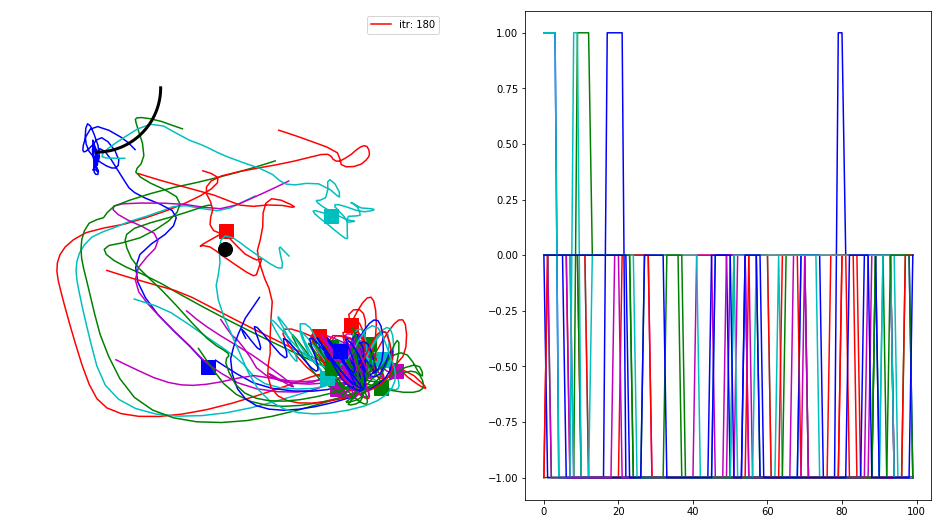

In [36]:
# Iterate through data file
# Choose and open one file
col=['r','m','c', 'g','b']
k=0
fig, (ax, ax2) = plt.subplots(1,2, figsize=(16, 9))
for filename in [files[w] for w in want]:
    try:
        f.close()
    except:
        pass
    f = h5py.File(filename, "r")

    o  = []
    a  = []
    r  = []
    x  = []
    dx = []
    endpts = []
    T  = 0

    episodes = f["episodes"]
    for k, i in enumerate(episodes):
        if k < 180:#% 20 != 0:
            continue
            
        try:
            grp = episodes[i]
            actions      = grp["actions"][()]
            observations = grp["observations"][()]
            rewards      = grp["rewards"][()]
            xs  = grp["xs"][()]
            dxs = grp["dxs"][()]
        except:
            continue

        # Append data to lists
        o.append(observations)
        a.append(actions)
        r.append(rewards)
        x.append(xs[...,:2] - np.array([0, -0.45])[np.newaxis,:])
        dx.append(dxs[...,:2])
        endpts.append(x[-1][-1,:])
        T += rewards.shape[0]

        print("Episode {}: {}".format(i, T))
        
        c = col[k % len(col)]
        ax.plot(x[-1][:,0], x[-1][:,1], color=c)
        ax.plot(x[-1][-1,0], x[-1][-1,1], color=c, marker='s', markersize=14)
        
        ax2.plot(r[-1], color=c)

    # Gather batch
    o  = np.concatenate(o, axis=0) # [T x 150 x 200 x 3]
    a  = np.concatenate(a, axis=0) # [T x 2]
    r  = np.concatenate(r, axis=0) # [T]
    x  = np.concatenate(x, axis=0) # [T x 2]
    dx = np.concatenate(dx, axis=0) # [T x 2]

labels=["itr: "+str(itr)   for itr in want ]

ax.plot([0.], [0.], color='k', marker='o', markersize=14)

#goal region
ang=np.linspace(0.0, -np.pi/2, 100)
arcx=[-.2+np.cos(a)*.1 for a in ang]
arcy=[.25+np.sin(a)*.1 for a in ang]
ax.plot(arcx, arcy, color='k', linewidth=3)

#boundary
bound=np.array([[-.2, .25,],[.2, .25,],[.2, -.25,],[-.2, -.25,], [-.2, .25,]])
#ax.plot(bound[:, 0], bound[:,1], color='r', linewidth=3)

ax.legend(labels, loc='best')
ax.axis('equal')
ax.axis('off')
plt.savefig('dqn_milestone_fine.png')
plt.show()





In [37]:
filepath = os.path.join("results","models")
sessions = glob.glob(os.path.join(filepath, "*"))
sessions = sorted(sessions, key=lambda f: os.stat(f).st_mtime)
session = sessions[-1]
print(session)
models = glob.glob(os.path.join(session, "*.meta"))
models = sorted(models, key=lambda f: os.stat(f).st_mtime)
model = models[-1][:-5]
print(model)

print(list_files())
files = sorted(glob.glob(os.path.join("results", "*.hdf5")), key=lambda f: os.stat(f).st_mtime)
filename = files[0]
print(filename)

results/models/03-19_15-47
results/models/03-19_15-47/model-175
[]
results/data-03-13_00-03.hdf5


INFO:tensorflow:Restoring parameters from results/models/03-19_15-47/model-175
all (0, 10) 10
(100000, 2)
(100000,)


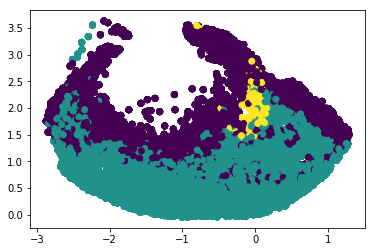

In [38]:
import tensorflow as tf
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file

def plot_reward(s, r):
    plt.scatter(s[:,0], s[:,1], c=r)
    plt.show()

# tf.reset_default_graph()
# saver = tf.train.Saver()

with tf.Session() as sess:
    saver = tf.train.import_meta_graph(model + ".meta")
    saver.restore(sess, model)
    
    test_batch = batch_data(size_batch=1000, extra=False, filename=filename, dataset="all", flatten=False)
    s = []
    r = []
#    for T in tf.contrib.graph_editor.get_tensors(tf.get_default_graph()):
#        print(T)

    for i in range(100):
        o_test, _, r_test = next(test_batch)
#        print(o_test.shape)

        graph = tf.get_default_graph()
        o = graph.get_tensor_by_name("rp_o:0")
        phi = graph.get_tensor_by_name("s:0")
        W = graph.get_tensor_by_name("W0:0")
#         o = graph.get_tensor_by_name("Placeholder:0")
#         phi = graph.get_tensor_by_name("add_3:0")
#         o_hat = graph.get_tensor_by_name("add_11:0")
#         o = graph.get_tensor_by_name("x:0")
#         phi = graph.get_tensor_by_name("mu_encoder:0")
#         o_hat = graph.get_tensor_by_name("x_hat:0")
        
        

    #     plt.scatter(s[:,0], s[:,1], c=r)
    #     plt.show()
        s_test = sess.run(phi, {o: o_test})
        s_test, W_test = sess.run([phi, W], {o: o_test})
#         s_test, o_hat_test = sess.run([phi, o_hat], {o: o_test})
        s.append(s_test[1:])
        r.append(r_test)
    
    s = np.concatenate(s, axis=0)
    r = np.concatenate(r, axis=0)
    print(s.shape)
    print(r.shape)
    plot_reward(s, r)